# Previsão Preço dos Carros

![](carro-usado-04122018165907261.jpeg)

**Empresa ficticia**

### COMPRACAR

A COMPRACAR atua no mercado automobilístico, caracterizada por ser uma empresa sólida, de tradição, que conjuga excelência no atendimento e veículos com rigorosa qualidade, com o objetivo único de tornar real o sonho de cada cliente.

Apostando em confiança e credibilidade como princípios fundamentais de sua atuação, a empresa busca no mercado somente veículos diferenciados, através de um rigoroso critério técnico de avaliação que garante qualidade e procedência.

A loja oferece automóveis de diversas marcas, semi-novos, Nacionais e Importados. Todos criteriosamente testados e avaliados, característica que a revenda traz consigo até hoje e a diferencia no mercado. E é assim que a COMPRACAR solidificou a sua marca, com uma conduta ética e respeito a seus clientes, parceiros e fornecedores.

## Checklist das Etapas

1. Definindo o problema
2. Captação dos dados
3. Análise exploratória dos dados
4. Preparação dos dados
5. Construção do modelo de Machine Learning
6. Avaliação do modelo

## 1. Definindo o problema.

Desde 2012, o faturamento da empresa COMPRACAR vem oscilando frequentemente, o que deixou o dono alerta para começar a implementar possíveis mudanças no gerenciamento e na forma de lidar com o cliente. Porém, a partir do ano de 2016 vem acumulando  prejuízos. 

O dono modernizou a empresa, criou site, estudou a concorrência e contratou melhores profissionais. No começo, essas mudanças tiveram um impacto significativo, porém não chegou no nível desejável. Foi então que o dono teve a ideia de que o maior problema era a compra de um carrosem saber se o valor desejável de revenda era aceitável. 

Para conseguir solucionar esse problema, se informou através de amigos e buscas na internet, conheceu o serviço de consultoria em ciência de dados  que prometia realizar essa análise e dizer o potencial preço do carro a ser revendido caso fosse comprado.

### Objetivo

O objetivo é criar um modelo que consiga analisar os dados dos carros e estimar o preço que um futuro carro possa valer a partir dessa base de dados histórica.

## 2. Captação dos dados

Dados disponivel no meu Github [nesse link](). NAO BOTEI LINK AINDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_df= pd.read_csv('dados.csv')
raw_df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [3]:
print('O Dataset possui {} linhas e {} colunas.'.format(raw_df.shape[0], raw_df.shape[1]))

O Dataset possui 4345 linhas e 9 colunas.


In [4]:
raw_df.describe().round(2)

,Price,Mileage,EngineV,Year
count,4173.00,4345.00,4195.00,4345.00
mean,19418.75,161.24,2.79,2006.55
std,25584.24,105.71,5.07,6.72
min,600.00,0.00,0.60,1969.00
25%,6999.00,86.00,1.80,2003.00
50%,11500.00,155.00,2.20,2008.00
75%,21700.00,230.00,3.00,2012.00
max,300000.00,980.00,99.99,2016.00


- O valor máximo do preço é muito maior do que os outros preços. Tendo em vista que até o terceiro quartil possuimos valor de RS21.700  e o máximo pulou para RS 300.000
- Encontramos um valor muito alto no valor máximo da feature ````[EngineV]````. Vamos analisá-la mais adiante.

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
raw_df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
for i in raw_df.columns:
    print(i)
    print(raw_df[i].dtype)
    print('Valores únicos são: {}'.format(raw_df[i].unique()))
    print('-' * 100)

Brand
object
Valores únicos são: ['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
----------------------------------------------------------------------------------------------------
Price
float64
Valores únicos são: [  4200.     7900.    13300.    23000.    18300.   199999.     6100.
  14200.    10799.     1400.    11950.     2500.     9500.    10500.
  16000.     8600.     2990.         nan  26500.     3500.    38233.
   7500.     6800.    24900.    20800.     6500.    13566.     8500.
   2900.    21500.    17900.    28500.     9800.    14500.     6000.
  67500.    33900.    63000.     7700.     9600.    12800.    41000.
   3700.    29500.     8250.    19500.    13500.     9200.    10900.
   5000.    23900.    36900.     8900.     7800.   133000.     1650.
  50000.     9700.     9999.    69999.     4300.     3000.     8700.
   9000.    20400.    13400.     9850.    15700.    24500.    11990.
  13708.5    8200.     6999.     6750.    18500.    14299.    1700

## 3. Análise exploratória dos dados

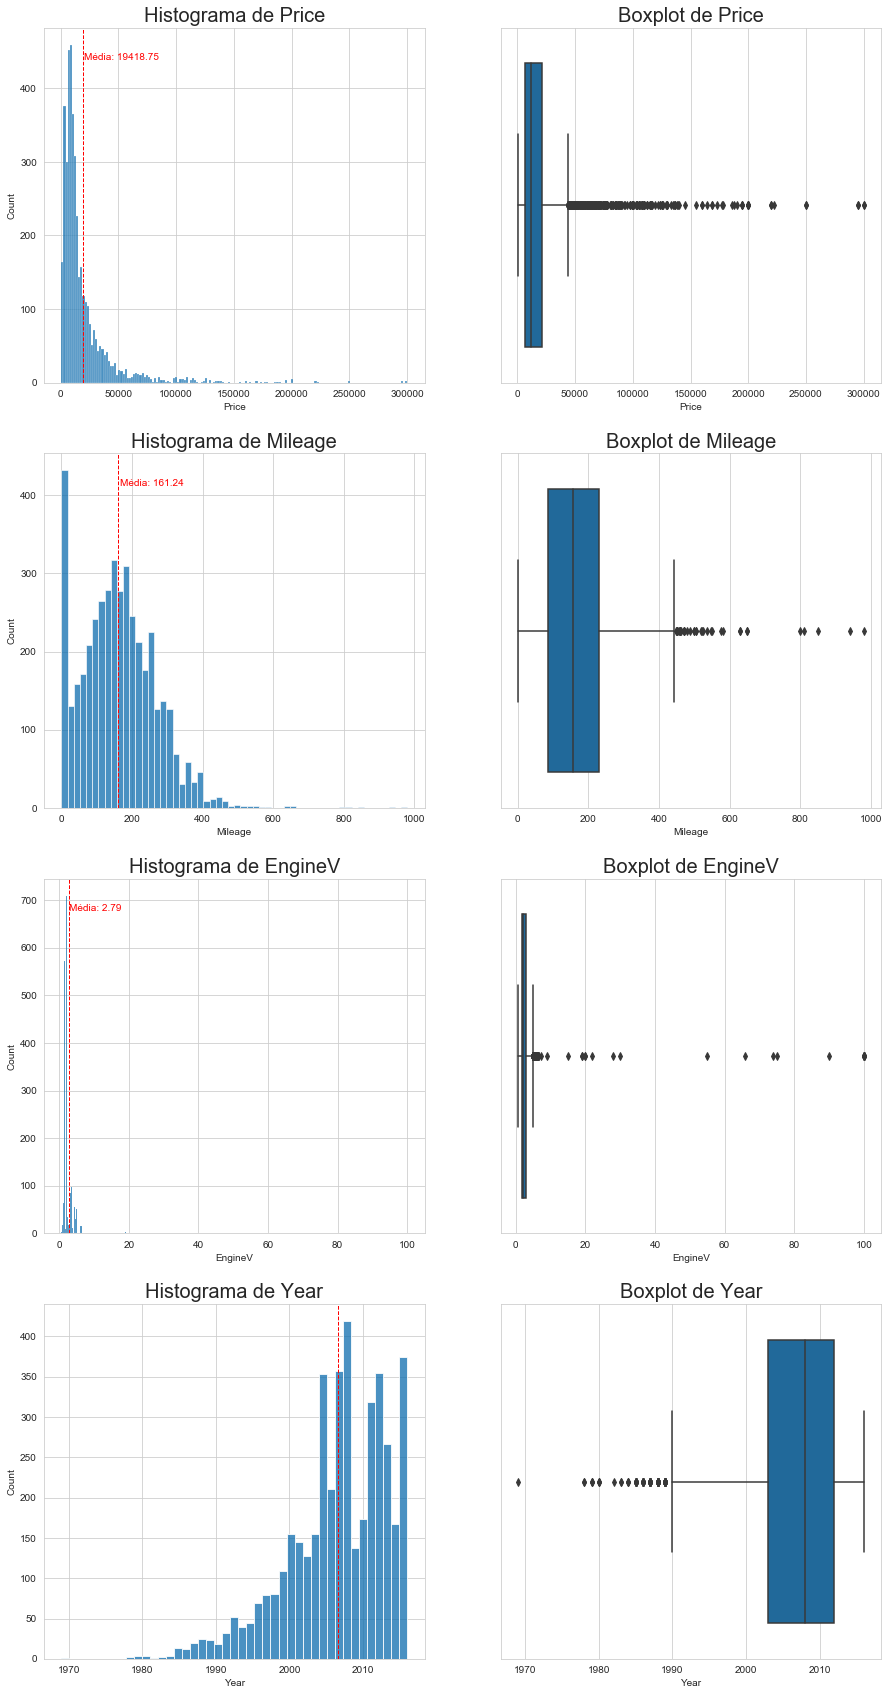

In [8]:
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

plt.figure(figsize= (15, 30))

lista1= ['Price', 'Mileage', 'EngineV', 'Year']

n= 1

for i in lista1:
    # Histograma
    plt.subplot(4, 2, n)
    sns.histplot(x= i, data= raw_df)
    plt.title('Histograma de {}'.format(i), fontsize= 20)
    
    # Linha da média
    min_ylim, max_ylim = plt.ylim()
    plt.text(raw_df[i].mean()*1.03, max_ylim*0.91, 'Média: {:.2f}'.format(raw_df[i].mean()), color= 'red')
    plt.axvline(raw_df[i].mean(), color='red', linestyle='dashed', linewidth=1)

    n+= 1
    
    # Boxplot
    plt.subplot(4, 2, n)
    sns.boxplot(x= i, data= raw_df)
    plt.title('Boxplot de {}'.format(i), fontsize= 20)
    n+= 1

### Insights

- Observamos uma grande quantidade de outliers nas features ````['Price', 'Mileage', 'EngineV', 'Year']```` no qual podem atrapalhar o nosso modelo.
- Após algumas pesquisas, mostrou que ````[EngineV]```` de um carro normal é 6.5.

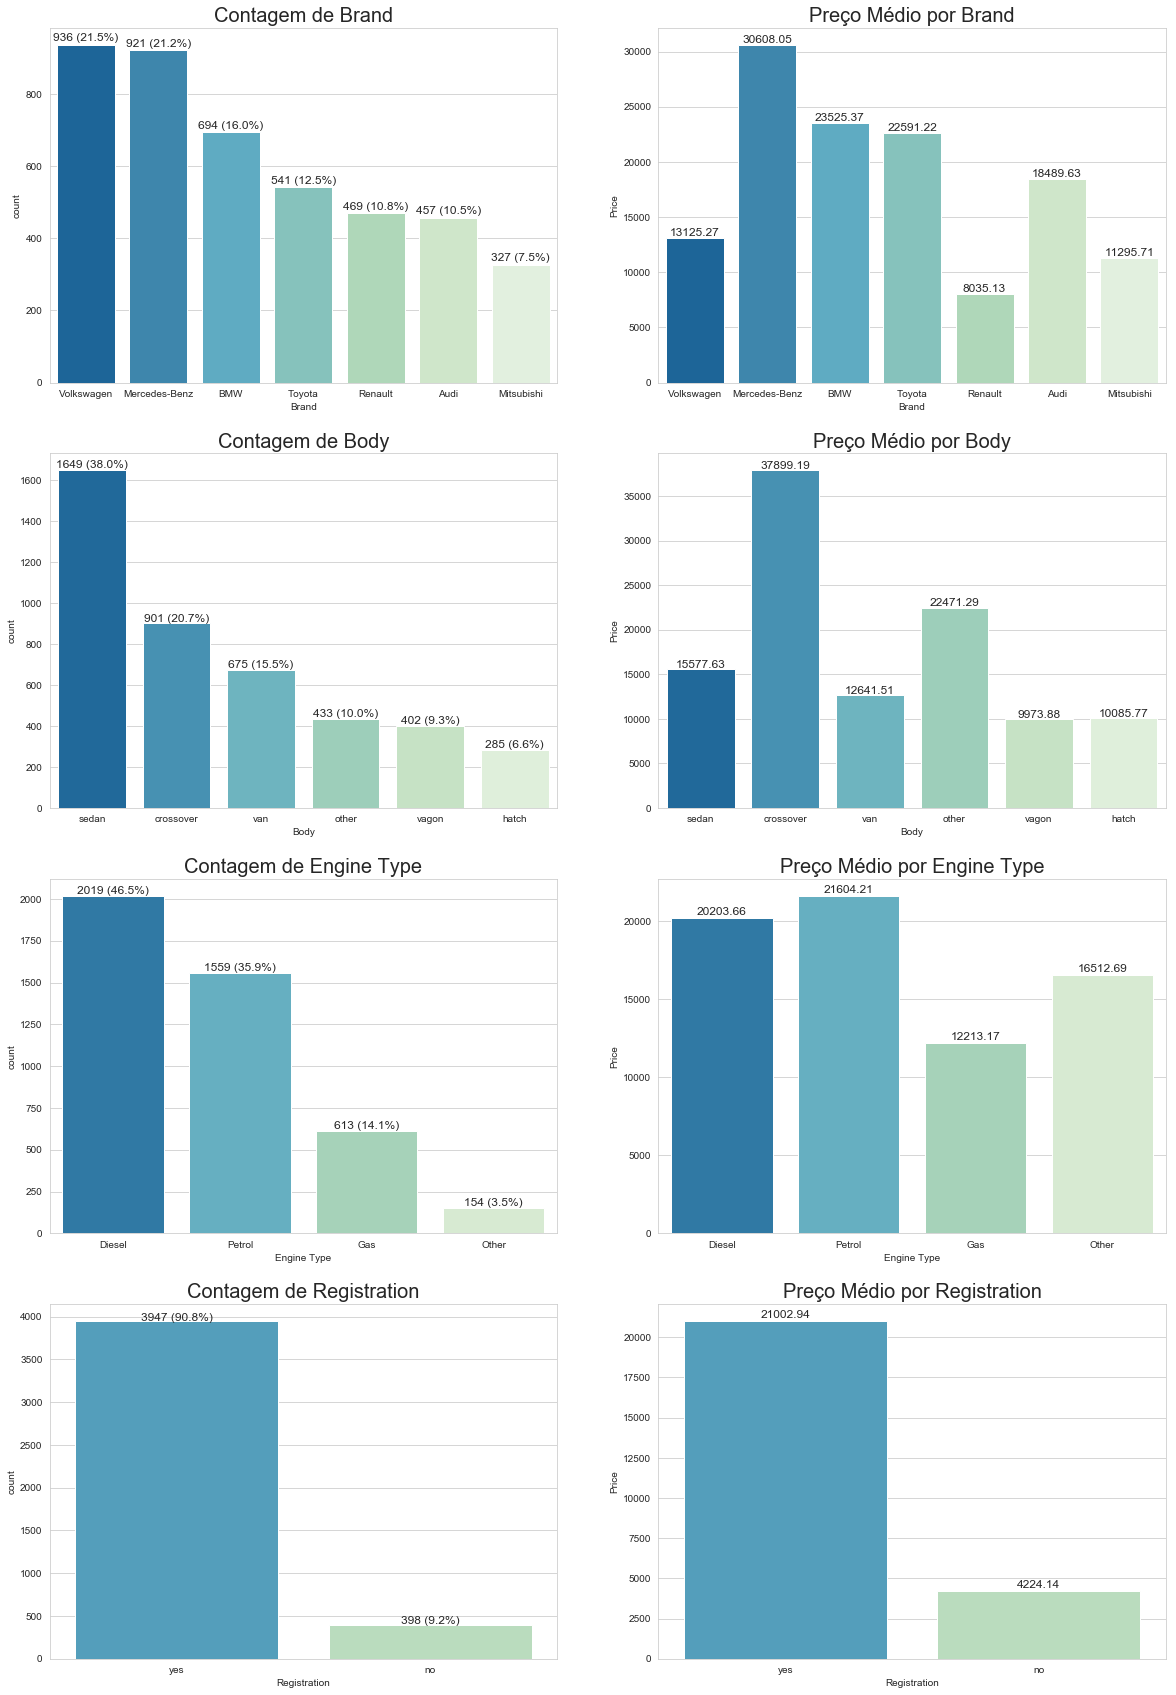

In [9]:
lista2= ['Brand', 'Body', 'Engine Type', 'Registration']

plt.figure(figsize= (20, 30))

n= 1

for i in lista2:
    # Countplot
    plt.subplot(4, 2, n)
    ax= sns.countplot(x= i, data= raw_df, order= raw_df[i].value_counts().index, palette= 'GnBu_r')
    plt.title('Contagem de {}'.format(i), fontsize= 20)
    
    # Números acima das barras
    for patch in ax.patches:
        height= patch.get_height()
        width= patch.get_width()
        left_coord= patch.get_x()
        
        ax.text(left_coord + width/2.0,
               height + 10, '{} ({:.1f}%)'.format(height, height/len(raw_df)*100), ha= 'center', fontsize= 12)
    
    n+= 1
    
    # Barplo
    plt.subplot(4, 2, n)
    ax= sns.barplot(x= i, y= 'Price', data= raw_df, order= raw_df[i].value_counts().index, palette= 'GnBu_r', ci= None)
    plt.title('Preço Médio por {}'.format(i), fontsize= 20)
    
    # Números acima das barras
    for patch in ax.patches:
        height= patch.get_height()
        width= patch.get_width()
        left_coord= patch.get_x()
        
        ax.text(left_coord + width/2.0,
               height + 200, height.round(2), ha= 'center', fontsize= 12)
    n+= 1

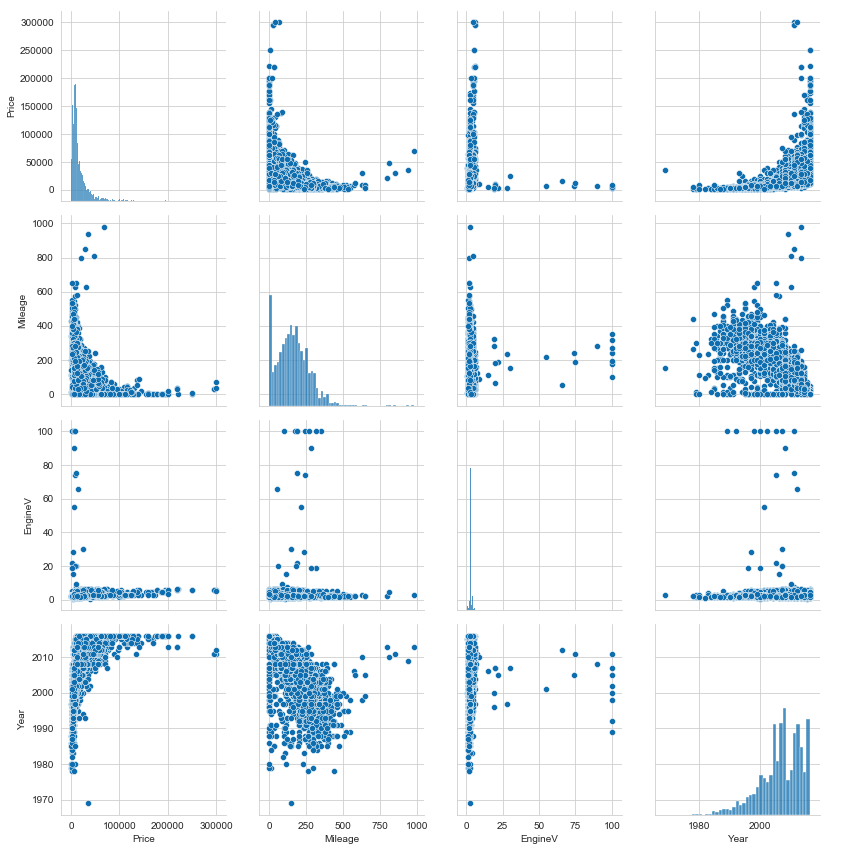

In [10]:
sns.pairplot(raw_df, height= 3, palette= 'GnBu_r')

### Insights

- Não visualizamos uma relação boa entre o preço e as outras features numéricas no gráfico. Podemos transformá-lo para log e ver se melhora essa relação.

## 4. Preparação dos dados

In [11]:
df= raw_df.copy()

### Tratamento dos dados
- No nosso dataset, vimos que a coluna ````EngineV```` possui dados que não condizem com a realidade, que são aqueles maiores que 6,5.
- Na coluna ````Price```` identificamos vários outliers como já descrito acima que são aqueles quando o preço é maior que 150.000.
- ````Year```` também possui outliers, que são aqueles mais antigos que 1990.
- Por último a feature ````Mileage```` possui outliers no entorno de 500 ou mais milhas nos carros.



Vamos filtrar todos esses outliers e ver se perdemos muitos dados do dataset.

In [12]:
# Tratando os dados
df= df[df['EngineV'] <= 6.5]
df= df[df['Price'] <= 150000]
df= df[df['Year'] >= 1990]
df= df[df['Mileage'] <= 500]

In [13]:
print('Ao filtrar os outliers perdemos {:.2f}% dos dados.'.format(100 - df.shape[0] / raw_df.shape[0] * 100))

Ao filtrar os outliers perdemos 11.14% dos dados.


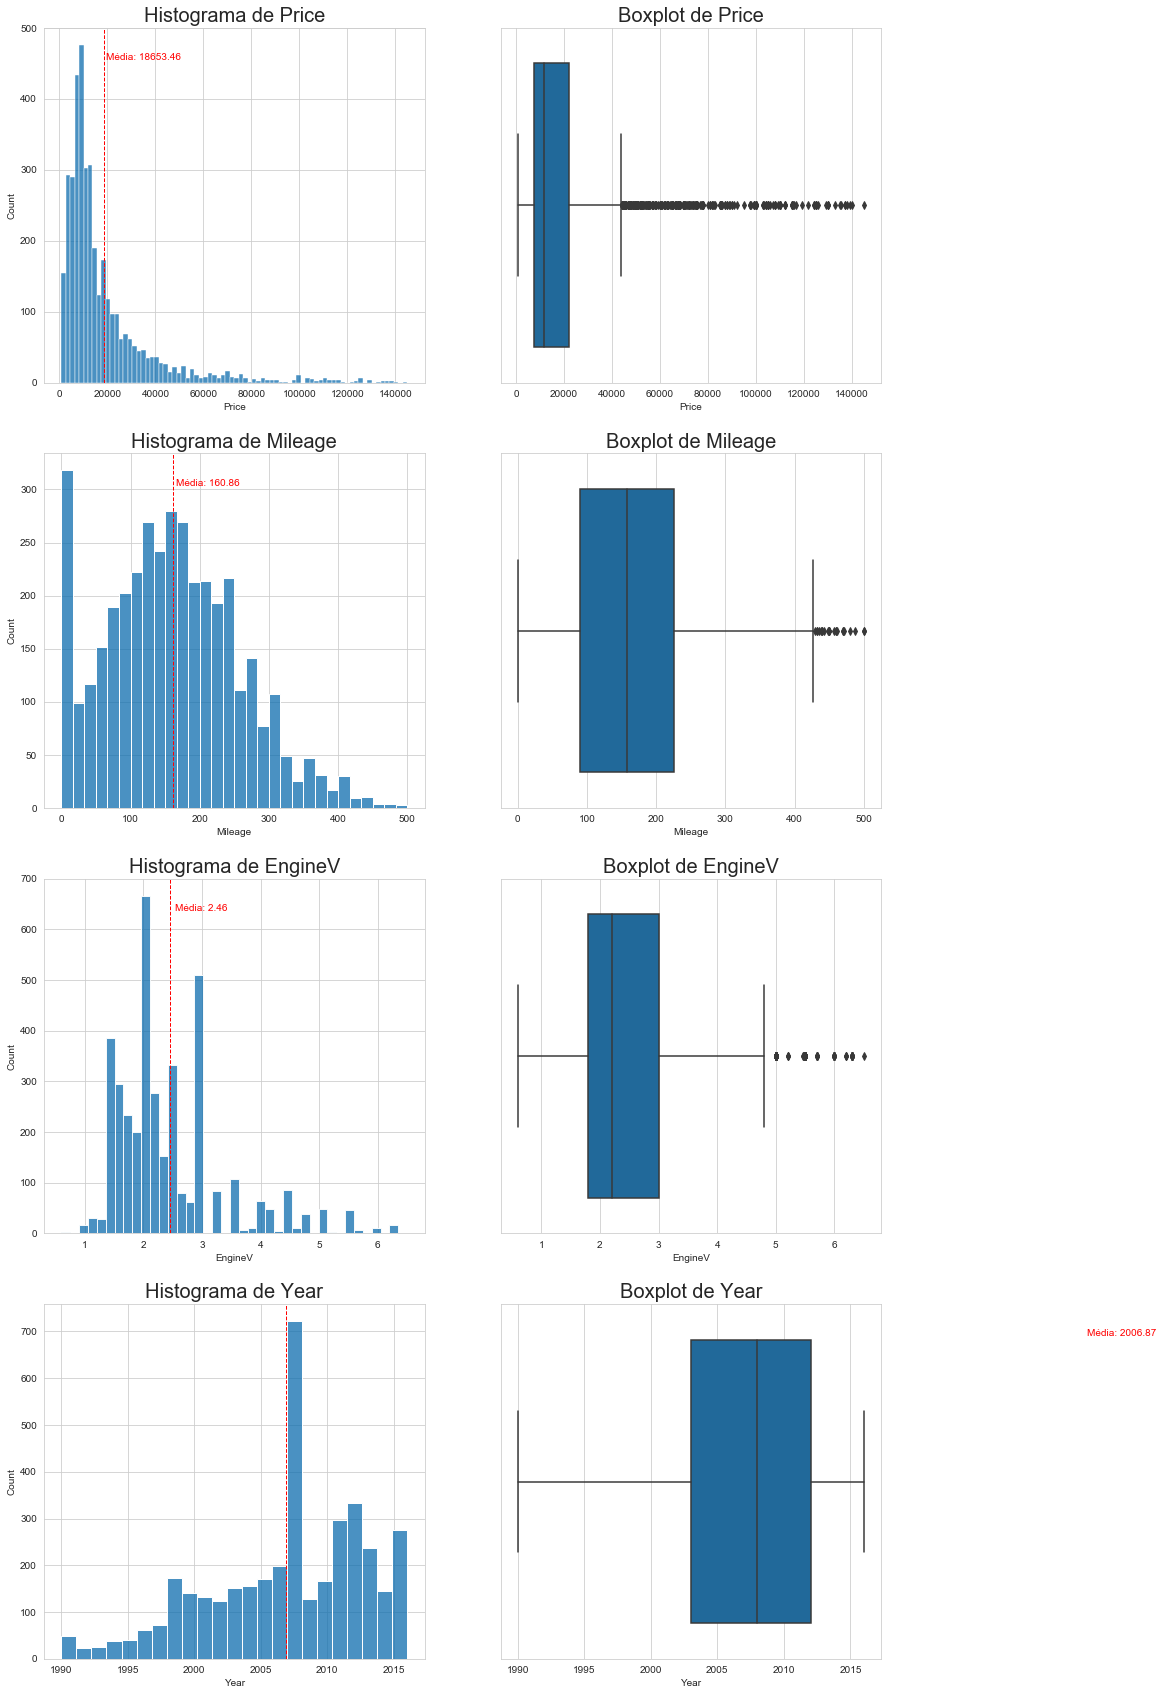

In [14]:
plt.figure(figsize= (15, 30))

lista1= ['Price', 'Mileage', 'EngineV', 'Year']

n= 1

for i in lista1:
    # Histograma
    plt.subplot(4, 2, n)
    sns.histplot(x= i, data= df)
    plt.title('Histograma de {}'.format(i), fontsize= 20)
       
    # Linha da média
    min_ylim, max_ylim = plt.ylim()
    plt.text(df[i].mean()*1.03, max_ylim*0.91, 'Média: {:.2f}'.format(df[i].mean()), color= 'red')
    plt.axvline(df[i].mean(), color='red', linestyle='dashed', linewidth=1)
    
    n+= 1
    
    # Boxplot
    plt.subplot(4, 2, n)
    sns.boxplot(x= i, data= df)
    plt.title('Boxplot de {}'.format(i), fontsize= 20)
    n+= 1

### Valores Missing
Quando possuimos valores missing no dataset, nós podemos tratá-los de duas maneiras:
* Completar arbitrariamente (média, mediana, moda, etc);
* Deletar a linha toda.

No nosso projeto, possuimos valores missing nas colunas ````['Price', 'EngineV']```` onde vamos colocar a mediana de cada uma.

In [15]:
# Valores Missing
df.isna().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

- Ao fazer o filtro dos dados acima, retiramos automaticamente os valores missing das colunas ````['Price', 'EngineV']````.

### Excluindo a features
A feature ````Model```` possui valores quase únicos para cada dado, não sendo necessária para o nosso modelo.

In [16]:
# Excluindo a features
df.drop(columns= ['Model'], inplace= True)

df.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


### Feature Engeneering
Vamos criar colunas com log dos valores numéricos para ver se melhora a relação entre as features.
para o nosso modelo funcionar, todas as colunas devem ser numéricas

In [17]:
df_log= df.copy()

df_log['log_Price']= np.log(df['Price'] + 1)

df_log.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.343078
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974745
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495594
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043293
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814711


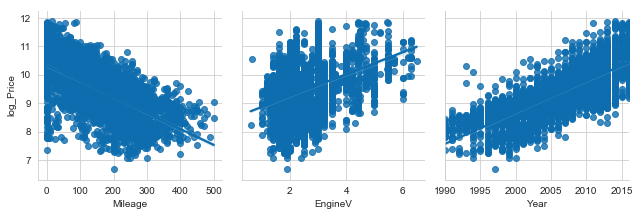

In [18]:
sns.pairplot(df_log, y_vars= 'log_Price', x_vars= ['Mileage', 'EngineV', 'Year'], kind= 'reg', height= 3)

- Conseguimos perceber que os dados ficaram bem mais correlacionados ao aplicar o log na coluna ````['Price']````

In [19]:
# Excluindo Price

df_log.drop(columns= 'Price', inplace= True)

### Matriz de Correlação

Text(0.5,1,'Matriz de Correlação')

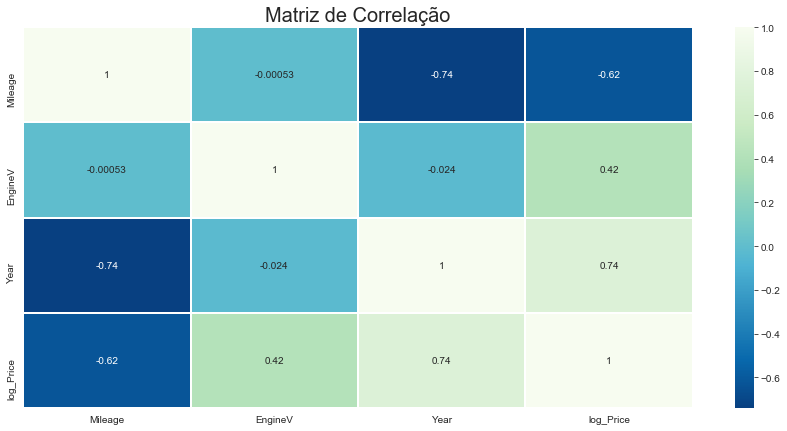

In [20]:
corr= df_log.corr()

plt.figure(figsize= (15, 7))

sns.heatmap(corr, annot= True, linewidths= 1, cmap= 'GnBu_r')
plt.title('Matriz de Correlação', fontsize= 20)

### Insights

- Year e o log_Price são altamente correlacionados, pois quanto mais novo o carro é, normalmente é mais barato.
- Year e Mileage são muito inversamente correlacionados, o que é esperado pois quanto mais novo o carro é, mais provável que tenha rodado menos.

### Pré-processamento dos dados

Nosso dataset ainda possui 4 variáveis qualitativas. Precisamos transformá-las em numéricas para o nosso modelo de regressão funcionar.

````['Brand', 'Body', 'Engine Type', 'Registration']```` são variáveis nominais, ou seja, não possui uma ordenação nos valores.


Por isso usaremos uma técnica chamada ````Onehotencoder```` que vai gerar vetores binários para cada feature.

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
onehot= OneHotEncoder()

x_cat= df_log[['Brand', 'Body', 'Engine Type', 'Registration']]

# Treinar a técnica e transformar o resultado em array
x_cat= onehot.fit_transform(x_cat).toarray()

# Transformar o array em um DataFrame
x_cat= pd.DataFrame(x_cat)

print(x_cat.shape)
x_cat.head()

(3861, 19)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [23]:
# Resetando o index de df pois fizemos filtros anteriormente e pode afetar a nossa concatenação
df_log.index= range(0, len(df))

# Concatenar com o dataset df
df_all= pd.concat([df_log, x_cat], axis= 1)

# Excluir colunas qualitativas
df_all.drop(columns= ['Brand', 'Body', 'Engine Type', 'Registration'], inplace= True)

print(df_all.shape)
df_all.head()

(3861, 23)


,Mileage,EngineV,Year,log_Price,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,277,2.0,1991,8.343078,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,427,2.9,1999,8.974745,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,358,5.0,2003,9.495594,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,240,4.2,2007,10.043293,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,120,2.0,2011,9.814711,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


## 5. Construção do modelo de Machine Learning.

### Separando dados em Treino e Teste

In [24]:
from sklearn.model_selection import train_test_split

# Separando a variável alvo das variáveis independentes
x= df_all.drop(columns= 'log_Price')
y= df_all.log_Price

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.3, random_state= 123)

### Padronizando as variáveis idependentes(X)

O método de padronização será o StandardScaler que funciona da seguinte maneira: 
* Padroniza as features removendo a média e escala a variância a uma unidade.
* Ou seja, para cada feature, a média seria 0, e o Desvio Padrão seria 1. Desta forma, as features são padronizadas, tornando-as mais manejáveis para nossos modelos.

In [25]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

# Padronizando as variáveis independentes de treino e teste
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.fit_transform(x_test)

### Regressão Linear

In [26]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()

In [27]:
# Treinando e obtendo o score do modelo
model.fit(x_train_scaled, y_train)

treino= model.score(x_train_scaled, y_train)
teste= model.score(x_test_scaled, y_test)
                    
print('O coeficiente R² no treino foi de {:.2f}%'.format(treino*100))
print('O coeficiente R² no teste foi de {:.2f}%'.format(teste*100))

O coeficiente R² no treino foi de 88.56%
O coeficiente R² no teste foi de 87.58%


Text(0.5,0,'y Teste')

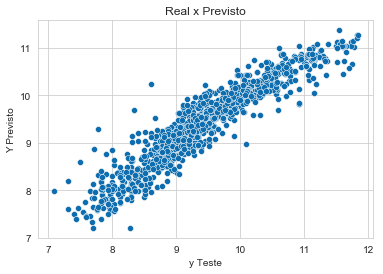

In [28]:
# Plotando gráfico Real x Previsto
y_pred= model.predict(x_test_scaled)

sns.scatterplot(x= y_test, y= y_pred)
plt.title('Real x Previsto')
plt.ylabel('Y Previsto')
plt.xlabel('y Teste')

Text(0.5,1,'Residuos')

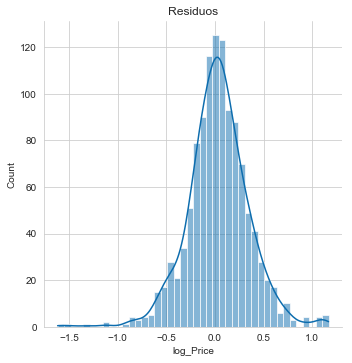

In [29]:
sns.displot(y_test - y_pred, kde= True)
plt.title('Residuos')

### Criando um DataFrame de Performace

In [30]:
# Achando o valor previsto fazendo a transformação inversa do log
df_performace= pd.DataFrame(np.exp(y_pred), columns= ['Previsto'])
df_performace.head()

,Previsto
0,19455.843142
1,6343.216415
2,8903.437068
3,9057.276245
4,8197.007101


In [31]:
# Achando o valor original fazendo a transformação inversa do log
df_performace['Teste']= np.exp(y_test.reset_index(drop= True))
df_performace.head()

,Previsto,Teste
0,19455.843142,17901.0
1,6343.216415,7501.0
2,8903.437068,6501.0
3,9057.276245,8900.0
4,8197.007101,8301.0


In [32]:
df_performace['Residuo']= abs(df_performace.Teste - df_performace.Previsto)
df_performace['Residuo%']= (df_performace.Residuo /  df_performace.Teste)*100

df_performace= df_performace.round(2)

df_performace.head()

,Previsto,Teste,Residuo,Residuo%
0,19455.84,17901.0,1554.84,8.69
1,6343.22,7501.0,1157.78,15.44
2,8903.44,6501.0,2402.44,36.95
3,9057.28,8900.0,157.28,1.77
4,8197.01,8301.0,103.99,1.25


In [33]:
df_performace.describe().round(2)

,Previsto,Teste,Residuo,Residuo%
count,1159.00,1159.00,1159.00,1159.00
mean,17011.24,19673.71,5161.37,23.80
std,14065.40,22068.60,10042.57,27.59
min,1352.49,1201.00,1.28,0.02
25%,7426.64,7201.00,774.41,7.92
50%,12787.92,11801.00,1759.29,17.59
75%,22068.69,22501.00,4604.75,31.11
max,86426.37,139001.00,83315.55,405.27


## 6. Avaliação do modelo

Nosso modelo de Regressão Linear obteve um resultado de 87,58% nos dados de teste, o que é uma pontuação bastante aceitável nesse nosso projeto.

Analisando a tabela de performace, podemos observar que:

- O erro médio da previsão do preço foi de 5.161,37 reais o que significa em média 23,8% do preço original.
- A pior previsão foi de quando o nosso modelo previu 83.315,55 reais de diferença do preço original.
- A melhor foi quando quase acertamos o resultado, a diferença foi de 1,28 real.